In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [7]:
df[df['Survived']==1].Sex.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [8]:
df[df['Survived']==0].Sex.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [9]:
import matplotlib.pyplot as plt

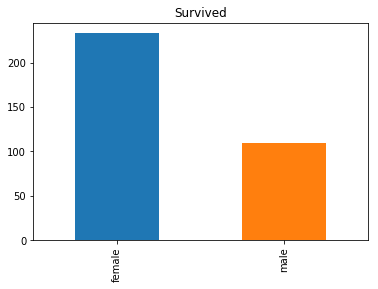

In [10]:
df[df['Survived']==1].Sex.value_counts().plot(kind='bar')
plt.title('Survived')
plt.show()

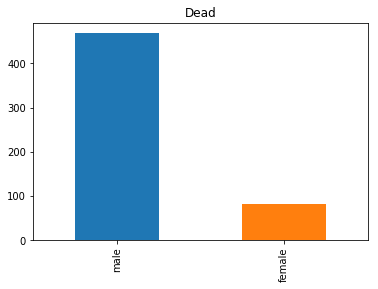

In [11]:
df[df['Survived']==0].Sex.value_counts().plot(kind='bar')
plt.title('Dead')
plt.show()

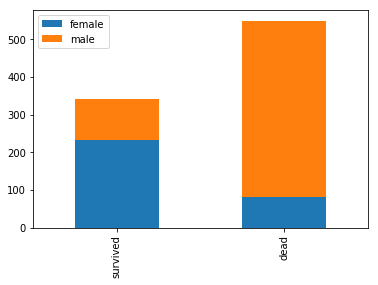

In [12]:
survived=df[df['Survived']==1].Sex.value_counts()
dead=df[df['Survived']==0].Sex.value_counts()

df_new=pd.DataFrame([survived,dead])
df_new.index=['survived','dead']

df_new.plot(kind='bar',stacked=True)

Text(0,0.5,'no. of person')

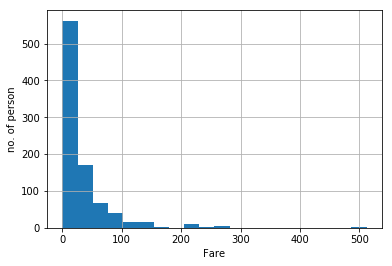

In [13]:
df.Fare.hist(bins=20)
plt.xlabel('Fare')
plt.ylabel("no. of person")

In [14]:
df.Fare.agg(['mean','median','max','min','count'])

mean       32.204208
median     14.454200
max       512.329200
min         0.000000
count     891.000000
Name: Fare, dtype: float64

In [15]:
df.Age.agg(['mean','median','max','min','count'])

mean       29.699118
median     28.000000
max        80.000000
min         0.420000
count     714.000000
Name: Age, dtype: float64

In [16]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [17]:
df.fillna({'Age':df.Age.median(),'Embarked':df.Embarked.value_counts().index[0]},inplace=True)

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
df1=df.loc[:,['Pclass','Sex','Age','Embarked']]

In [20]:
df_new=pd.get_dummies(df1[df1.columns])

In [21]:
df_new.head()

,Pclass,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,0,1,0,0,1
1,1,38.0,1,0,1,0,0
2,3,26.0,1,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,1,0,0,1


In [22]:
x=df_new.values
x

array([[ 3., 22.,  0., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  1., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [23]:
y=df.Survived.values


In [24]:
from sklearn.cross_validation  import train_test_split

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [26]:
#from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log=LogisticRegression()

In [29]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
log.score(x_test,y_test)

0.7988826815642458

In [31]:
log.score(x_train,y_train)

0.7879213483146067

## sensivity is a recall

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
pred=log.predict(x_test)


In [34]:
confusion_matrix(y_test,pred)

array([[91, 19],
       [17, 52]], dtype=int64)

In [35]:
52/71

0.7323943661971831

In [36]:
import numpy as np
np.bincount(y_test)

array([110,  69], dtype=int64)

In [37]:
from sklearn.metrics import recall_score,precision_score,roc_auc_score

In [38]:
recall_score(y_test,pred)

0.7536231884057971

precision:
    
    it is the number of positive predictions 

In [39]:
precision_score(y_test,pred)

0.7323943661971831

ROC(Reciver operating characteristic):
    
    ROC matrix to evalute classifier output
    
    ROC curve typically feature TP rate on the y axis, and FP rate on the X axis
    
    ROC curve is typically used in binary classification to study the output of a classifier
    
    Shows trade-off b/w TP and FP rate

False postive rate:
    
    =FP/(TN+FP)
    
    

AUC is the percentage of ROC plot that is underneath the curve:
    
    AUC is usefull even when there is high class imbalnace
    
    AUC is usefull as a single number summary of

In [40]:
pos=[]
for i in log.predict_proba(x_test):
    pos.append(i[1])

In [41]:
#pos

In [42]:
roc_auc_score(y_test,pos)

0.8713438735177865

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
        

In [44]:
clf1=RandomForestClassifier()
clf2=DecisionTreeClassifier()

In [45]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
print(clf1.score(x_train,y_train))
clf1.score(x_test,y_test)

0.8960674157303371


0.8100558659217877

In [47]:
print(clf2.score(x_train,y_train))
clf2.score(x_test,y_test)

0.901685393258427


0.7988826815642458

In [48]:
from sklearn.preprocessing import MinMaxScaler 

In [50]:
scaler=MinMaxScaler()
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.fit_transform(x_test)

In [51]:
log.fit(x_train_scaler,y_train)
clf1.fit(x_train_scaler,y_train)
clf2.fit(x_train_scaler,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
print(log.score(x_test_scaler,y_test))
print(clf1.score(x_test_scaler,y_test))
clf2.score(x_test_scaler,y_test)

0.7932960893854749
0.8044692737430168


0.776536312849162